In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from scipy import stats

In [20]:
bucket='group15forestdata/covtype.csv'

data_location='s3://{}/'.format(bucket)

df=pd.read_csv(data_location)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [21]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


<AxesSubplot: >

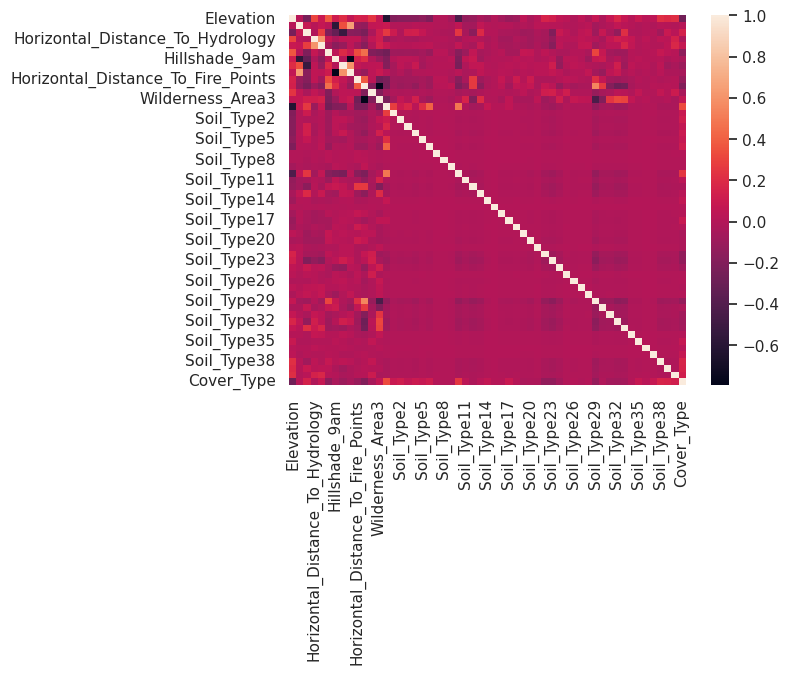

In [22]:
sns.heatmap(df.corr())

# Scatter plot analysis of Forest Cover Types based on Elevation and Aspect

The scatter plot illustrates the correlation between the elevation and aspect of various woods. The plot is color-coded according on the type of cover. It is obvious that as elevation increases, aspect variety decreases. The plot also reveals the concentration of various types of forest cover, indicating that elevation and aspect may have a significant role in determining the kind of forest cover.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


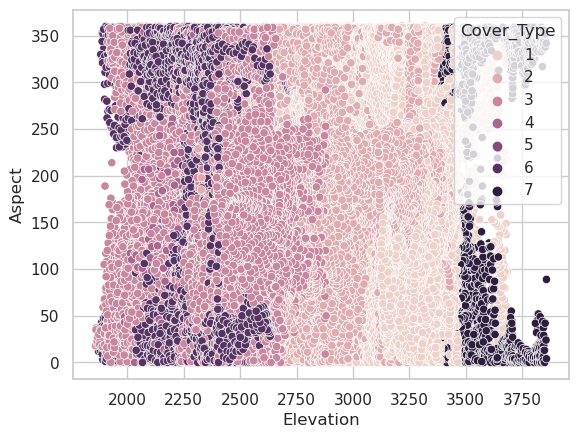

In [23]:
sns.scatterplot(x='Elevation', y='Aspect', data=df, hue='Cover_Type')
plt.show()

# Histogram analysis of Slope Values in Forest Areas

The histogram displays the frequent distribution of slope values across distinct forest regions. The majority of slopes fall between 0 and 20, and as slope values rise, their frequency gradually decreases. The line of the histogram represents an estimated smoothed slope distribution.

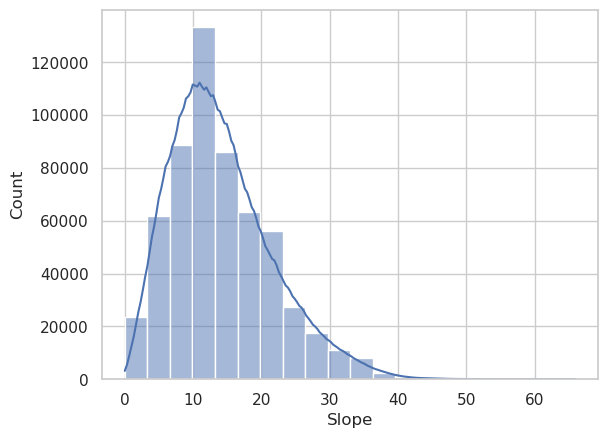

In [24]:
sns.histplot(data=df, x="Slope", bins=20, kde=True)
plt.show()

 # Box Plot Analysis of Horizontal Distance to Nearest Water Source for Forest Cover Types

The box plot shows how each of the seven different types of forest cover distributes the horizontal distance (hydrology) to the nearest water source. The top and lower edges of each box represent the interquartile range, while the horizontal center line of each box represents the median value. The picture also includes dots above or below the whiskers to represent individual outliers.

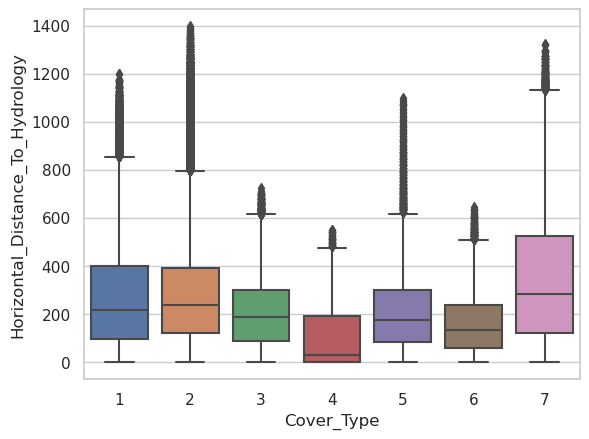

In [25]:
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', data=df)
plt.show()

# Hillshade Comparison of Forest Cover Types at 9am

The graph shows the correlation between the hillshade value at 9 am and the kind of forest cover. The graph's lines depict various types of forest cover, while the y-axis displays the comparable hillshade value. By examining the graph, we can compare and contrast the hillshade values for various types of cover.


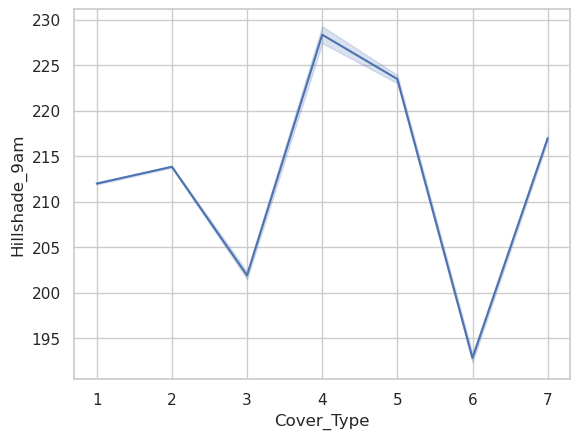

In [26]:
sns.lineplot(x='Cover_Type', y='Hillshade_9am', data=df)

plt.show()

# Violin Plot Analysis of Elevation Distribution by Forest Cover Type

The graph uses a violin plot to show the frequency distribution of elevation values for each type of forest cover. The x-axis shows various cover kinds, while the y-axis shows corresponding elevation levels. The following plots have boxes that are part of the "Distribution of Elevation by Cover Type" figure.


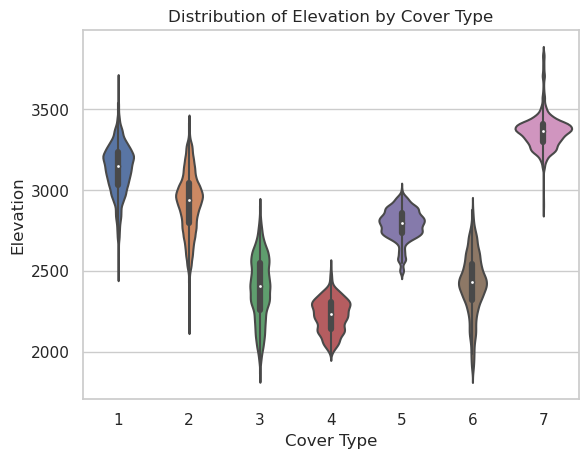

In [27]:
sns.set(style='whitegrid')
sns.violinplot(x='Cover_Type', y='Elevation', data=df, inner='box')
plt.xlabel('Cover Type')
plt.ylabel('Elevation')
plt.title('Distribution of Elevation by Cover Type')
plt.show()


# Scatter Plot Analysis of Distances to Hydrology by Soil Type2

The scatter figure illustrates the relationship between the horizontal and vertical distances to hydrology. The regression line is disregarded (fit_reg=False), and the graphic is colored according to whether Soil_Type2 is present or not.


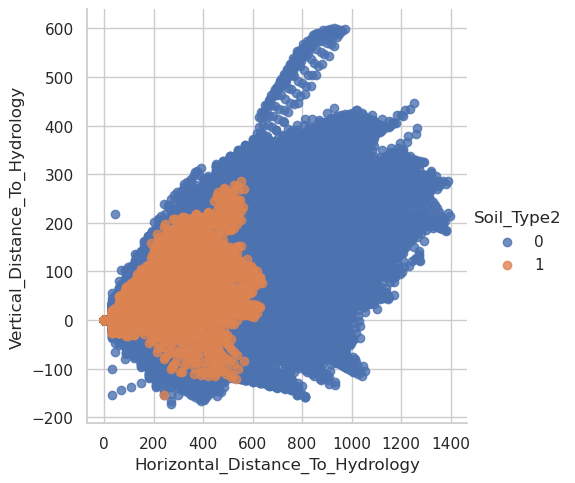

In [28]:
sns.lmplot(x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', data=df, hue='Soil_Type2',fit_reg=False)
plt.show()

# Bar Chart Analysis of Soil Type Frequency in the Dataset

The graph displays the frequency of occurrence for each soil type in the dataset using a horizontal bar chart. The plot is constructed using a black grid, and the soil types are organized in decreasing order based on the number of observations. The y-axis of the figure is also reversed.



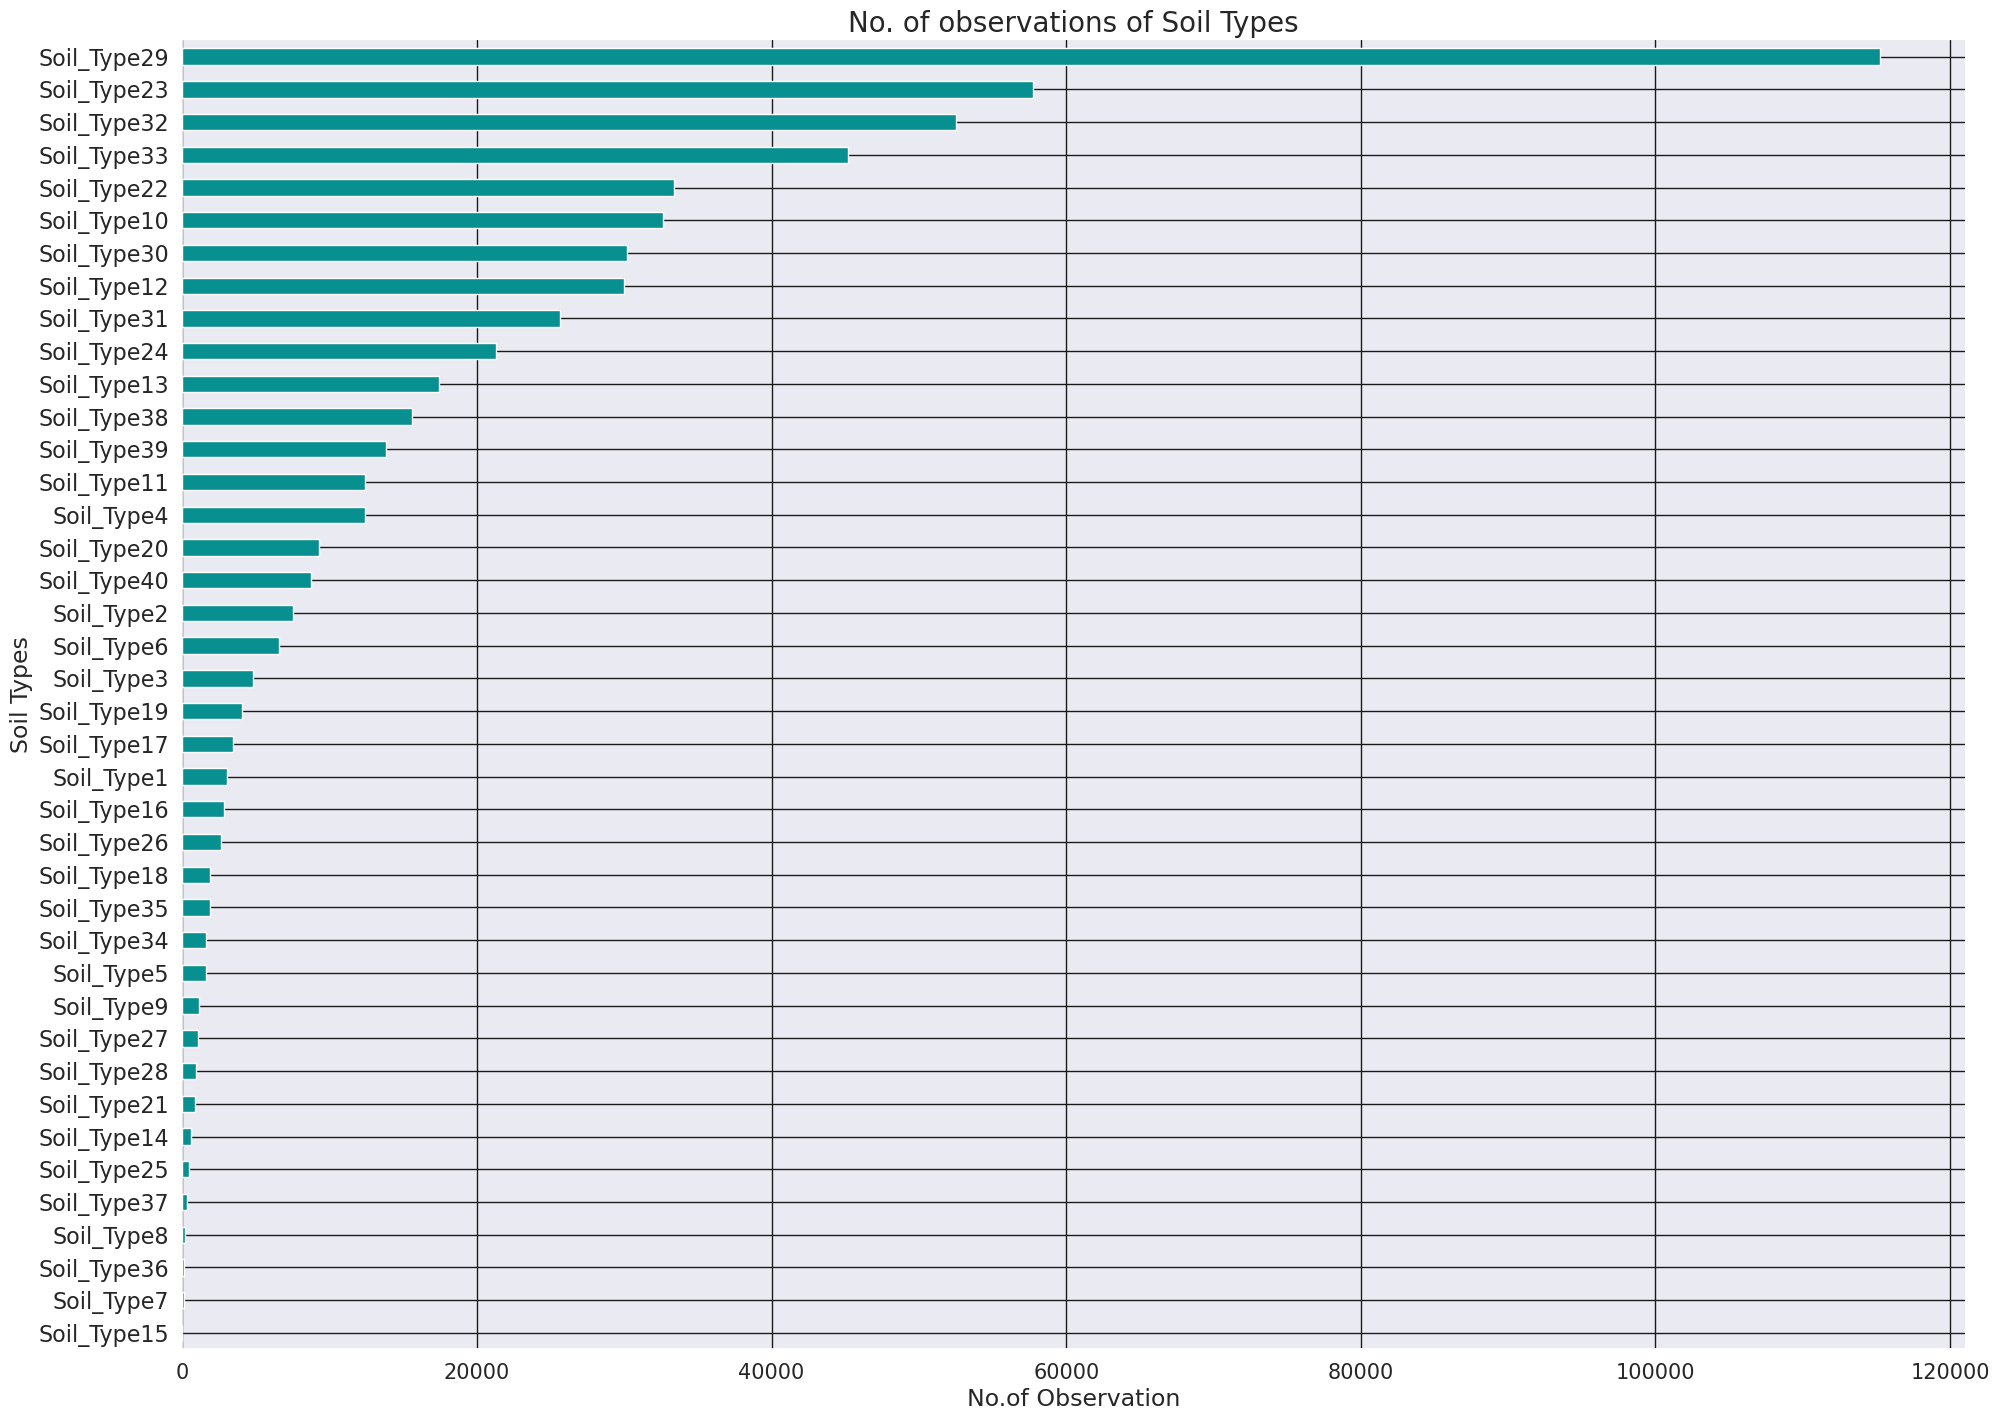

In [29]:
sns.set_style("darkgrid", {'grid.color': '.1'})
Soil_data = df.iloc[:, 14:54]
soil_sum = pd.Series(Soil_data.sum())
soil_sum.sort_values(ascending=False, inplace=True)
soil_sum.plot(kind='barh', figsize=(23, 17), color='#088F8F')
plt.gca().invert_yaxis()
plt.title('No. of observations of Soil Types', size=20)
plt.xlabel('No.of Observation', size=17)
plt.ylabel('Soil Types', size=17)
plt.xticks(rotation='horizontal', size=15)
plt.yticks(size=16)
sns.despine()
plt.show()

# Pie Chart Analysis of Cover Type Distribution in the Dataset

The pie graphic displays how the various cover types are distributed throughout the dataset. The number of observations is shown by the size of each slice in the graph, which represents a distinct kind of cover. Additionally, each slice of the figure has labels that display the percentage of observations for each type of cover.


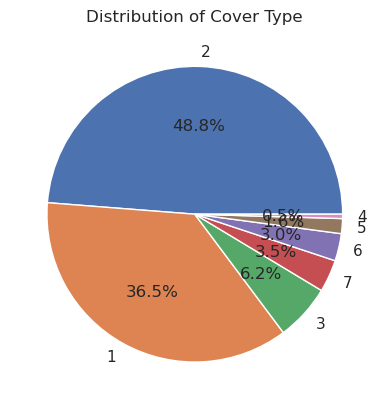

In [30]:
sns.set(style='whitegrid')
counts = df['Cover_Type'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Cover Type')
plt.show()


# Splitting the Data into training and testing

In [31]:
X = df.drop(['Cover_Type'], axis=1)
y = df['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluating the performance of the linear regression model using MSE and accuracy

In [33]:
mse = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse)
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lr.round()))

Linear Regression MSE: 1.3258707463215813
Linear Regression Accuracy: 0.5495641248504772


# Creating a decision tree model

In [34]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)


# Evaluating the performance of the decision tree model using MSE and accuracy

In [35]:
mse_dtc = mean_squared_error(y_test, y_pred_dtc)
print("Decision Tree MSE:", mse_dtc)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtc))

Decision Tree MSE: 0.29464815882550366
Decision Tree Accuracy: 0.9394593943357744
